In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import pchip_interpolate

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Systems_Design_Preferendus.genetic_algorithm_pfm.genetic_algorithm_pfm.algorithm import GeneticAlgorithm

Set Weights for Different Objectives

1. City counsil         --> Costs
2. Surfing community:   --> Ride length
3. Reseach: sediment    --> Trapping
4. Local community:     --> Safety
5. Tourisme:            --> Economic growth

In [2]:
# Set weights for the objectives
w1 = 0.2  # weight for costs
w2 = 0.2  # weight for ride length
w3 = 0.2  # weight for sediment trapping
w4 = 0.2  # weight for safety
w5 = 0.2  # economic growth

In [ ]:
# Vectorized objective functions
def objective_function_1(x1, x2):
    """
    Cost function (vectorized).
    
    :param x1: reef length
    :param x2: reef depth below sea level 
    """
    cons1 = 2.5   # costs per material
    cons2 = 30  # material used per metre lenght
    cons3 = 10  # material used per metre depth 
    return cons1 * cons2 * cons3 * np.array(x1) * (10 - np.array(x2))

def objective_function_2(x1, x2):
    """
    Ride-length function (vectorized).
    
    :param x1: reef length
    :param x2: reef depth below sea level 
    """
    cons4 = 1.2  # ride lenght gained per metre length
    cons5 = 0.5  # ride lenght gained per metre depth
    return cons4 * np.array(x1) - cons5 * np.array(x2)

def objective_function_3(x1, x2):
    """
    Sediment-trapping function (vectorized).
    
    :param x1: reef length
    :param x2: reef depth below sea level 
    """
    cons6 = 300  # sediment trapping per metre depth
    cons7 = 1.5  # optimal depth for sediment trapping
    cons8 = 0.7  # sensitivity of sediment trapping to depth changes
    return cons6 * np.array(x1) * np.exp(-1 * ((np.array(x2) - cons7) / cons8) ** 2)

def objective_function_4(x1, x2):
    """"
    Safety function (vectorized).
    
    :param x1: reef length
    :param x2: reef depth below sea level 
    """
    cons9 = 15
    cons10 = 280
    cons11 = 15
    return cons9 * (np.array(x2) - 0.5)* np.exp(-1 * ((np.array(x1) - cons10) / cons11) ** 2)
    
def objective_function_5(x1, x2):
    """"
    Economic growth function (vectorized).
    
    :param x1: reef length
    :param x2: reef depth below sea level 
    """
    cons12 = 400000000
    cons13 = 280
    return cons12 * (((np.array(x2) + 0.5) / 2.5) ** 3 + 1) * (np.array(x1) / cons13)


# Preference functions that convert raw objective values to 0-100 preference scores
def objective_p1(x1, x2):
    """Map cost -> preference score. Lower cost -> higher preference."""
    cost = objective_function_1(x1, x2)
    return pchip_interpolate([150000, 2000000], [100, 0], cost)

def objective_p2(x1, x2):
    """Map ride-length -> preference score. Higher ride length -> higher preference."""
    ride = objective_function_2(x1, x2)
    return pchip_interpolate([30, 150, 350], [0, 50, 100], ride)

def objective_p3(x1, x2):
    """Map sediment trapping -> preference score. Higher sediment trapping -> higher preference."""
    sediment = objective_function_3(x1, x2)
    return pchip_interpolate([0, 80000, 126000], [0, 100, 10], sediment)

def objective_p4(x1, x2):
    """Map safety -> preference score. Lower accidents -> higher preference."""
    safety = objective_function_4(x1, x2)
    return pchip_interpolate([10, 1000], [100, 0], safety)

def objective_p5(x1, x2):
    """Map economic growth -> preference score. Higher growth -> higher preference."""
    growth = objective_function_5(x1, x2)
    return pchip_interpolate([0, 400000000], [0, 100], growth)

def objective(variables):
    """Objective function that is fed to the GA. Expects variables with two columns (x1,x2)."""
    # ensure variables is a 2D numpy array
    vars_arr = np.atleast_2d(variables)
    x1 = vars_arr[:, 0]
    x2 = vars_arr[:, 1]

    # calculate the preference scores (vectorized)
    p_1 = objective_p1(x1, x2)
    p_2 = objective_p2(x1, x2)
    p_3 = objective_p3(x1, x2)
    p_4 = objective_p4(x1, x2)
    p_5 = objective_p5(x1, x2)

    # return weights and preference arrays to the GA
    return [w1, w2, w3, w4, w5], [p_1, p_2, p_3, p_4, p_5]

Define Constraints and Bounds


In [4]:
def constraint_1(variables):
    """Constraint placeholder: return per-individual zeros (no violation).

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: 1-D array (length n) with constraint values; arr>0 means violation for 'ineq' constraints.
    """
    # decode variables if needed; here we simply indicate no violation for any individual
    n = variables.shape[0]
    return np.zeros(n)


def constraint_2(variables):
    """Constraint placeholder: return per-individual zeros (no violation).

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: 1-D array (length n) with constraint values; arr>0 means violation for 'ineq' constraints.
    """
    n = variables.shape[0]
    return np.zeros(n)


# define list with constraints
cons = [['ineq', constraint_1], ['ineq', constraint_2]]

# set bounds for all variables
b1 = [30, 280]  # x1
b2 = [0.5, 3]  # x2
bounds = [b1, b2]

Plot objectives for x1 and x2


Cost:
  Min: 1.58e+05 $
  Max: 2.00e+06 $

Ride Length:
  Min: 3.45e+01 m
  Max: 3.36e+02 m

Sediment Trapping:
  Min: 9.12e+01 units
  Max: 8.40e+04 units

Safety (Accidents):
  Min: 0.00e+00 accidents
  Max: 3.75e+01 accidents

Economic Growth:
  Min: 4.56e+07 $
  Max: 1.50e+09 $


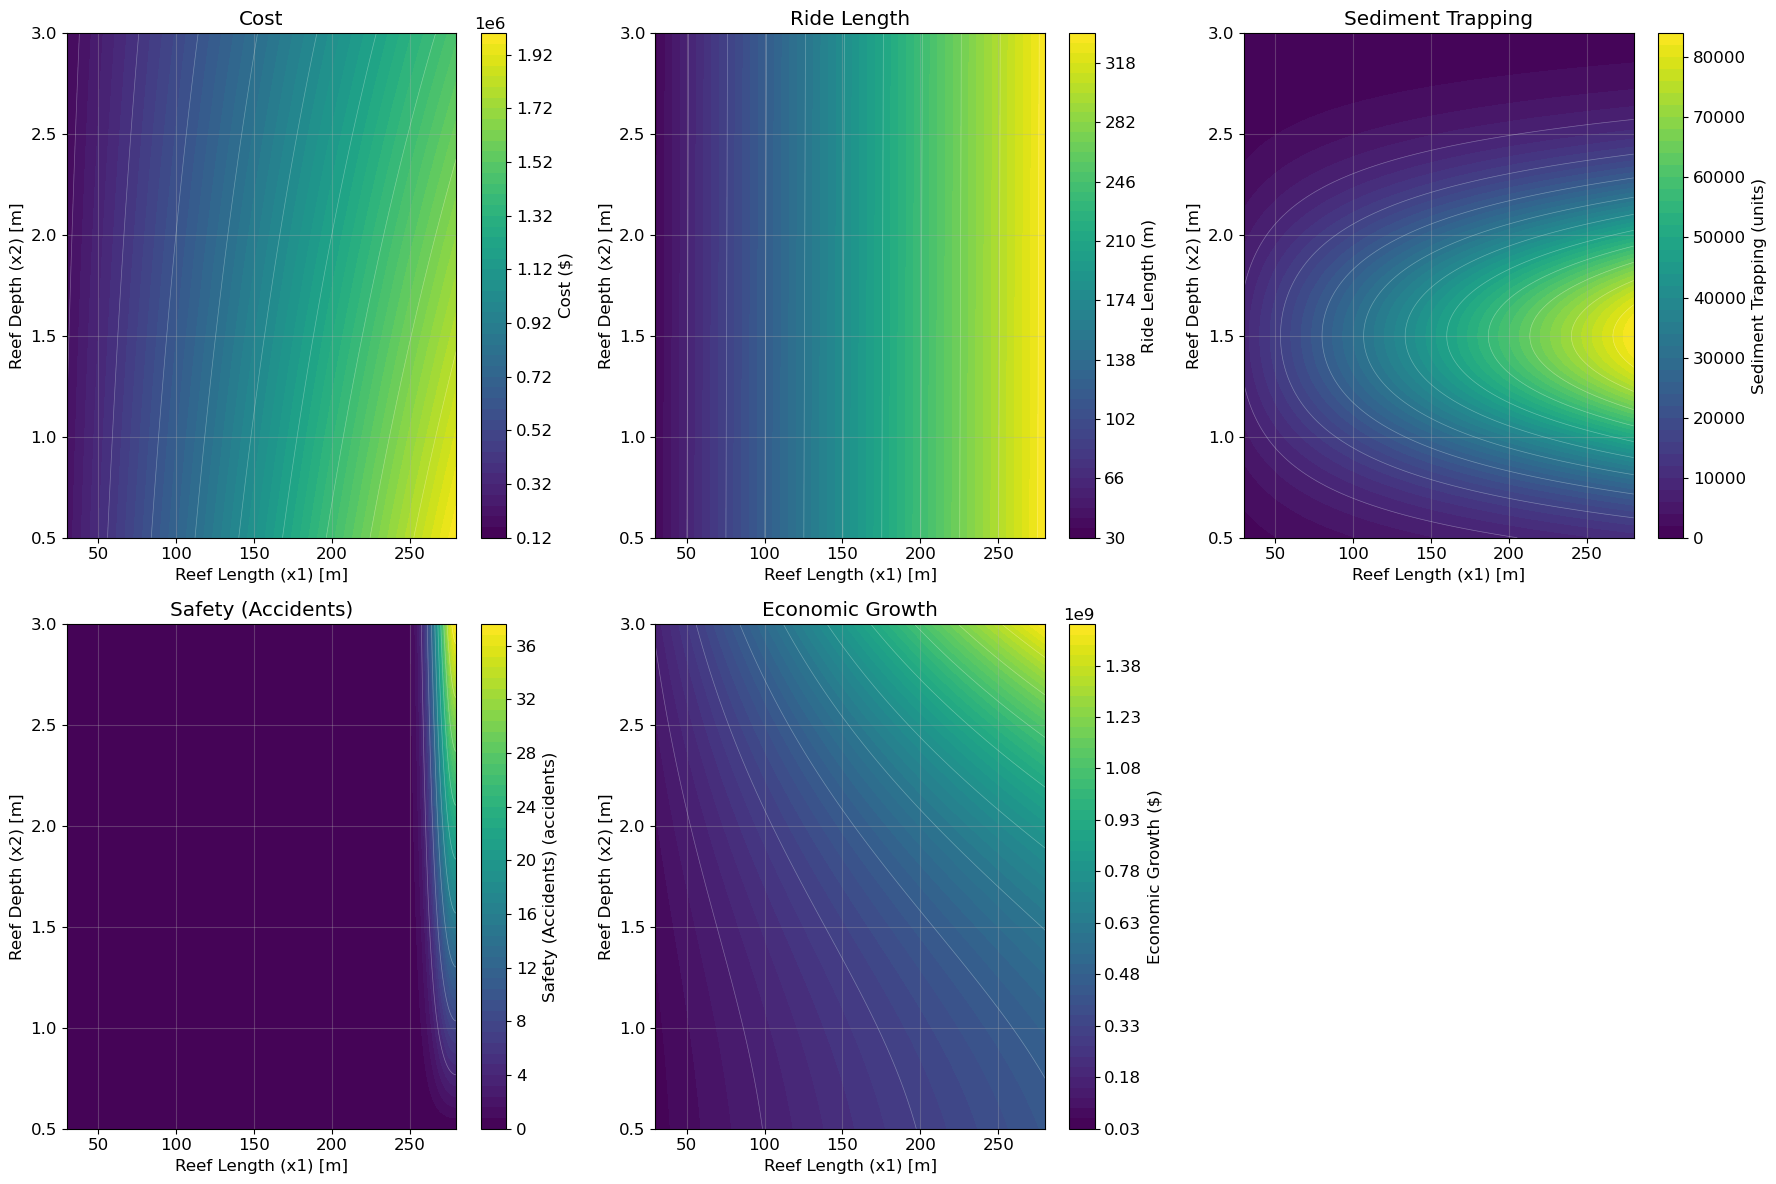


Heatmaps generated successfully!


In [8]:
# Create mesh grid
x1 = np.linspace(b1[0], b1[1], 200)
x2 = np.linspace(b2[0], b2[1], 200)
X1, X2 = np.meshgrid(x1, x2)

# Store objective functions and their names
objectives = [
    (objective_function_1, "Cost", "$"),
    (objective_function_2, "Ride Length", "m"),
    (objective_function_3, "Sediment Trapping", "units"),
    (objective_function_4, "Safety (Accidents)", "accidents"),
    (objective_function_5, "Economic Growth", "$")
]

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Loop through each objective function
for idx, (obj_func, name, unit) in enumerate(objectives):
    # Calculate objective values over the grid
    Z = obj_func(X1, X2)
    
    # Print min and max values
    print(f"\n{name}:")
    print(f"  Min: {Z.min():.2e} {unit}")
    print(f"  Max: {Z.max():.2e} {unit}")
    
    # Plot heatmap
    ax = axes[idx]
    contour = ax.contourf(X1, X2, Z, levels=50, cmap='viridis')
    plt.colorbar(contour, ax=ax, label=f'{name} ({unit})')
    
    # Add contour lines for better readability
    ax.contour(X1, X2, Z, levels=10, colors='white', alpha=0.3, linewidths=0.5)
    
    ax.set_xlabel('Reef Length (x1) [m]')
    ax.set_ylabel('Reef Depth (x2) [m]')
    ax.set_title(f'{name}')
    ax.grid(True, alpha=0.3)

# Remove extra subplot
axes[-1].remove()

plt.tight_layout()
plt.savefig('objective_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*50)
print("Heatmaps generated successfully!")
print("="*50)

Graphical Output


Saved preference functions figure to: /home/meesr/studie/design/narrowneck-reef-2025/output/preference-functions/2x5_preference_functions.png


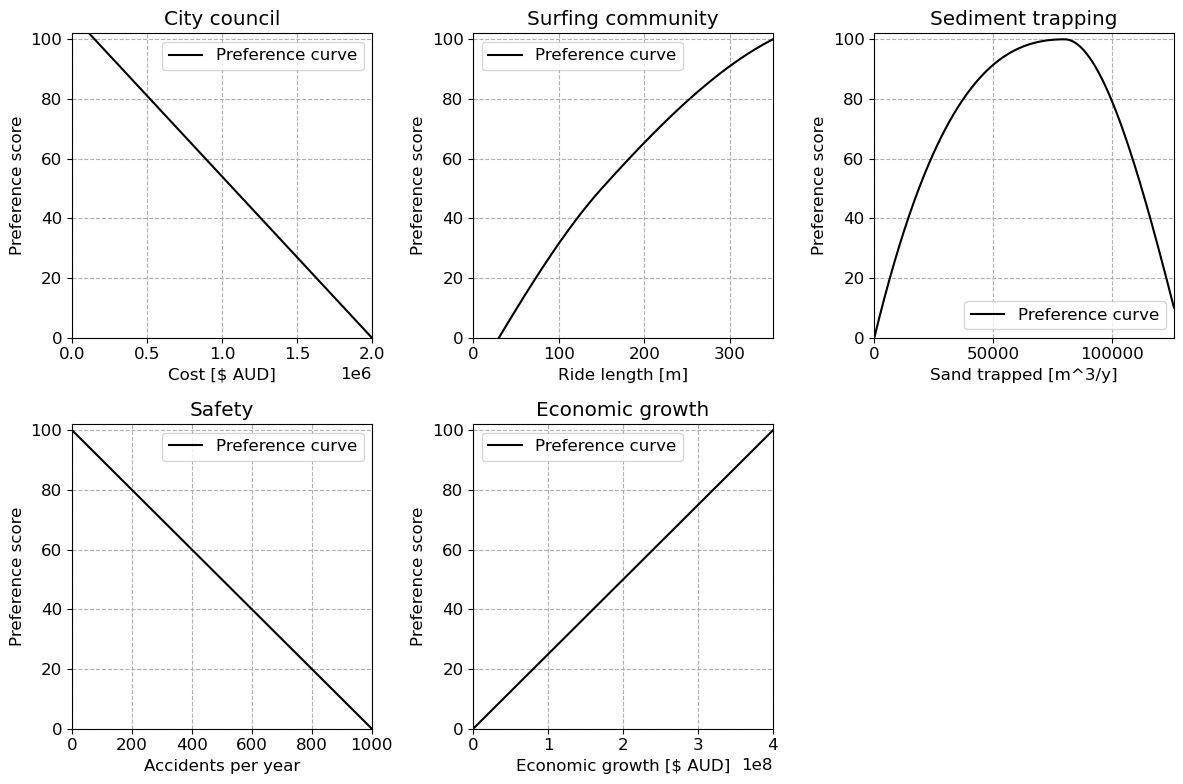

In [5]:
# create arrays for plotting continuous preference curves (use distinct names so we don't overwrite constants)
c1_vals = np.linspace(0, 2000000, 300)
c2_vals = np.linspace(0, 350, 300)
c3_vals = np.linspace(0, 126000, 300)
c4_vals = np.linspace(0, 1000, 300)
c5_vals = np.linspace(0, 400000000, 300)

# calculate the preference functions using the same knots as the preference mappings
p1_vals = pchip_interpolate([150000, 2000000], [100, 0], c1_vals)
p2_vals = pchip_interpolate([30, 150, 350], [0, 50, 100], c2_vals)
p3_vals = pchip_interpolate([0, 80000, 126000], [0, 100, 10], c3_vals)
p4_vals = pchip_interpolate([0, 1000], [100, 0], c4_vals)
p5_vals = pchip_interpolate([0, 400000000], [0, 100], c5_vals)

# create figure that plots all preference curves and the preference scores of the returned results of the GA
fig = plt.figure(figsize=((12,8)))

font1 = {'size':20}
font2 = {'size':15}

plt.rcParams['font.size'] = '12'
plt.rcParams['savefig.dpi'] = 300

ax1 = fig.add_subplot(2, 3, 1)
ax1.plot(c1_vals, p1_vals, label='Preference curve', color='black')
ax1.set_xlim((min(c1_vals), max(c1_vals)))
ax1.set_ylim((0, 102))
ax1.set_title('City council')
ax1.set_xlabel('Cost [$ AUD]')
ax1.set_ylabel('Preference score')
ax1.grid()
ax1.grid(linestyle = '--')

ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(c2_vals, p2_vals, label='Preference curve', color='black')
ax2.set_xlim((min(c2_vals), max(c2_vals)))
ax2.set_ylim((0, 102))
ax2.set_title('Surfing community')
ax2.set_xlabel('Ride length [m]')
ax2.set_ylabel('Preference score')
ax2.grid()
ax2.legend()
ax2.grid(linestyle = '--')

# Add third subplot for sediment trapping preference curve
ax3 = fig.add_subplot(2, 3, 3) 
ax3.plot(c3_vals, p3_vals, label='Preference curve', color='black')
ax3.set_xlim((min(c3_vals), max(c3_vals)))
ax3.set_ylim((0, 102))
ax3.set_title('Sediment trapping')
ax3.set_xlabel('Sand trapped [m^3/y]')
ax3.set_ylabel('Preference score')
ax3.grid()
ax3.legend()
ax3.grid(linestyle = '--')

ax4 = fig.add_subplot(2, 3, 4) 
ax4.plot(c4_vals, p4_vals, label='Preference curve', color='black')
ax4.set_xlim((min(c4_vals), max(c4_vals)))
ax4.set_ylim((0, 102))
ax4.set_title('Safety')
ax4.set_xlabel('Accidents per year')
ax4.set_ylabel('Preference score')
ax4.grid()
ax4.legend()
ax4.grid(linestyle = '--')

ax5 = fig.add_subplot(2, 3, 5) 
ax5.plot(c5_vals, p5_vals, label='Preference curve', color='black')
ax5.set_xlim((min(c5_vals), max(c5_vals)))
ax5.set_ylim((0, 102))
ax5.set_title('Economic growth')
ax5.set_xlabel('Economic growth [$ AUD]')
ax5.set_ylabel('Preference score')
ax5.grid()
ax5.legend()
ax5.grid(linestyle = '--')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
fig.tight_layout()

#Two lines to make our compiler able to draw:
# ensure output directory exists and save the figure
out_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'output', 'preference-functions') if 'Systems_Design_Preferendus' in os.getcwd() else os.path.join(os.getcwd(), '..', 'output', 'preference-functions')
out_dir = os.path.abspath(out_dir)
fn = os.path.join(out_dir, '2x5_preference_functions.png')
fig.savefig(fn, dpi=300, bbox_inches='tight')
print(f'Saved preference functions figure to: {fn}')

Optimization

Now we have everything for the optimization, we can run it. For more information about the different options to configure the GA, see the docstring of GeneticAlgorithm (via help()) or chapter 4 of the reader. Once we have the results, we can make some figures. First, the resulting design variables are plotted into the solution space. Secondly, we can plot the preference functions together with the results of the optimizations.



Run GA with minmax
The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            8.3103       14.741           0            0.006        0           
1            8.1144       10.5149          0            0.257        0           
2            8.1144       9.2217           1            0.368        0           
3            8.1144       8.7355           2            0.451        0           
4            8.1144       8.6482           3            0.456        0           
5            8.1144       8.681            4            0.459        0           
6            8.1144       8.6259           5            0.463        0           
7            8.1144       8.5471           6            0.46         0           
8            8.1144       8.5602           7            0.455        0           
9            8.1144       8.5245           8            0.458        0           
Stopped at gen 9
Exe

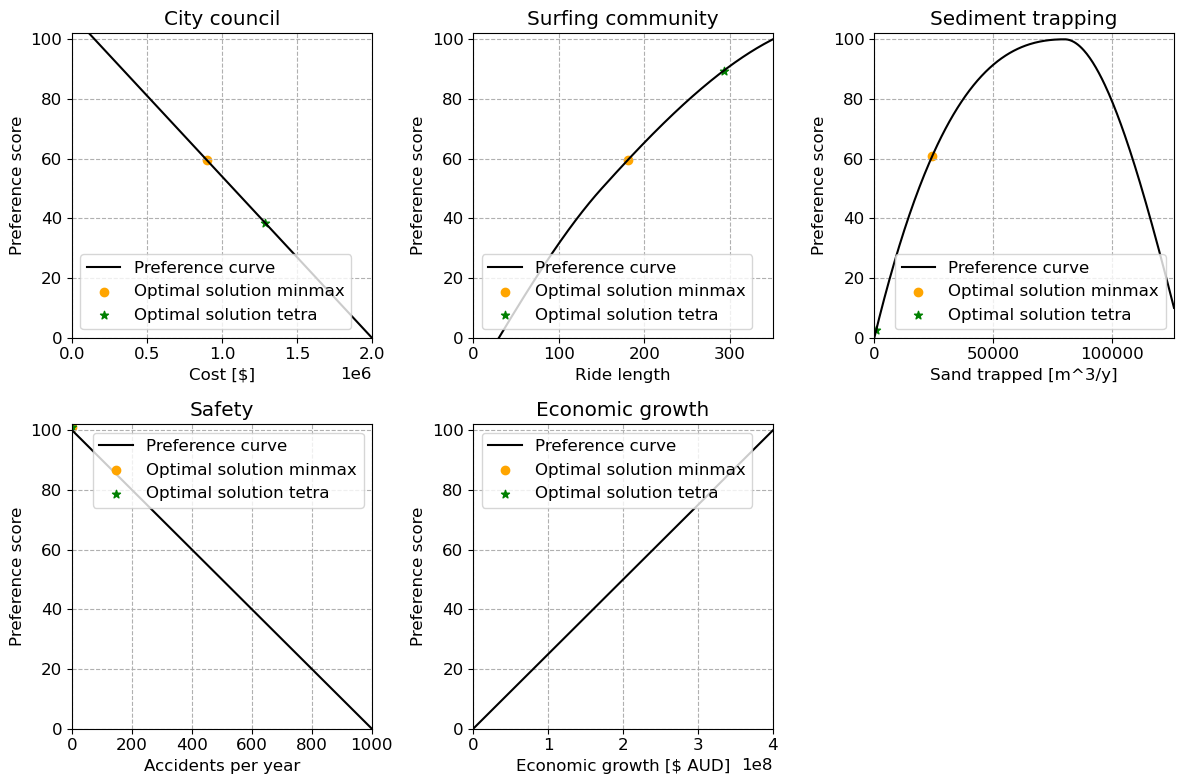

In [6]:
# Run the optimization with two paradigms (minmax and tetra)
paradigm = ['minmax', 'tetra']
marker = ['o', '*']
colours = ['orange','green']

# Prepare figure and axes
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)

for i, agg in enumerate(paradigm):
    # GA options
    options = {
        'n_bits': 8,
        'n_iter': 400,
        'n_pop': 500,
        'r_cross': 0.8,
        'max_stall': 8,
        'aggregation': agg,  # minmax or tetra
        'var_type': 'real'
    }

    # run the GA and get result
    print(f'Run GA with {agg}')
    ga = GeneticAlgorithm(objective=objective, constraints=cons, bounds=bounds, options=options)
    score, design_variables, _ = ga.run()

    # design_variables contains [x1, x2] for this notebook
    x1_opt = float(design_variables[0])
    x2_opt = float(design_variables[1])


    print(f'Optimal result for x1 = {round(x1_opt, 2)}, x2 = {round(x2_opt, 2)}')

    # compute raw objective values and preference scores for the optimal design
    c1_res = float(objective_function_1(x1_opt, x2_opt))
    p1_res = float(objective_p1(x1_opt, x2_opt))

    c2_res = float(objective_function_2(x1_opt, x2_opt))
    p2_res = float(objective_p2(x1_opt, x2_opt))

    c3_res = float(objective_function_3(x1_opt, x2_opt))
    p3_res = float(objective_p3(x1_opt, x2_opt))
    
    c4_res = float(objective_function_4(x1_opt, x2_opt))
    p4_res = float(objective_p4(x1_opt, x2_opt))

    c5_res = float(objective_function_5(x1_opt, x2_opt))
    p5_res = float(objective_p5(x1_opt, x2_opt))

    # Debug prints
    print(f"c1_res: {c1_res}, p1_res: {p1_res}")
    print(f"c2_res: {c2_res}, p2_res: {p2_res}")
    print(f"c3_res: {c3_res}, p3_res: {p3_res}")
    print(f"c4_res: {c4_res}, p4_res: {p4_res}")
    print(f"c5_res: {c5_res}, p5_res: {p5_res}")

    # Plot preference curves once (they are defined over the raw objective axes)
    if i == 0:
        # cost preference curve (use the same knots as objective_p1)
        ax1.plot(c1_vals, p1_vals, label='Preference curve', color='black')
        ax1.set_xlim((min(c1_vals), max(c1_vals)))
        ax1.set_ylim((0, 102))
        ax1.set_title('City council')
        ax1.set_xlabel('Cost [$]')
        ax1.set_ylabel('Preference score')
        ax1.grid(linestyle='--')

        # ride-length preference curve (use the same knots as objective_p2)
        ax2.plot(c2_vals, p2_vals, label='Preference curve', color='black')
        ax2.set_xlim((min(c2_vals), max(c2_vals)))
        ax2.set_ylim((0, 102))
        ax2.set_title('Surfing community')
        ax2.set_xlabel('Ride length')
        ax2.set_ylabel('Preference score')
        ax2.grid(linestyle='--')
        
        ax3.plot(c3_vals, p3_vals, label='Preference curve', color='black')
        ax3.set_xlim((min(c3_vals), max(c3_vals)))
        ax3.set_ylim((0, 102))
        ax3.set_title('Sediment trapping')
        ax3.set_xlabel('Sand trapped [m^3/y]')
        ax3.set_ylabel('Preference score')
        ax3.grid(linestyle='--')
        
        ax4.plot(c4_vals, p4_vals, label='Preference curve', color='black')
        ax4.set_xlim((min(c4_vals), max(c4_vals)))
        ax4.set_ylim((0, 102))
        ax4.set_title('Safety')
        ax4.set_xlabel('Accidents per year')
        ax4.set_ylabel('Preference score')
        ax4.grid(linestyle='--')
        
        ax5.plot(c5_vals, p5_vals, label='Preference curve', color='black')
        ax5.set_xlim((min(c5_vals), max(c5_vals)))
        ax5.set_ylim((0, 102))
        ax5.set_title('Economic growth')
        ax5.set_xlabel('Economic growth [$ AUD]')
        ax5.set_ylabel('Preference score')
        ax5.grid(linestyle='--')
        
        
    # Scatter the GA result on the preference plots
    ax1.scatter(c1_res, p1_res, label='Optimal solution ' + agg, color=colours[i], marker=marker[i])
    ax2.scatter(c2_res, p2_res, label='Optimal solution ' + agg, color=colours[i], marker=marker[i])
    ax3.scatter(c3_res, p3_res, label='Optimal solution ' + agg, color=colours[i], marker=marker[i])
    ax4.scatter(c4_res, p4_res, label='Optimal solution ' + agg, color=colours[i], marker=marker[i])
    ax5.scatter(c5_res, p5_res, label='Optimal solution ' + agg, color=colours[i], marker=marker[i])

# finalize plot
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
fig.tight_layout()

# ensure output directory exists and save the optimization figure
out_dir_opt = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'output', 'optimization') if 'Systems_Design_Preferendus' in os.getcwd() else os.path.join(os.getcwd(), '..', 'output', 'optimization')
out_dir_opt = os.path.abspath(out_dir_opt)
fn_opt = os.path.join(out_dir_opt, '2x5_optimization_results.png')
fig.savefig(fn_opt, dpi=300, bbox_inches='tight')
print(f'Saved optimization figure to: {fn_opt}')
plt.show()

In [7]:
print(type(x1_opt), x2_opt)
print(objective_function_1(x1_opt, x2_opt))


<class 'float'> 2.98046875
1289016.2658691406
